<a href="https://colab.research.google.com/github/xuandong3110/Customer-Churn-ML/blob/main/customer_churn_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data for DA/customer churn.csv')

# EDA


In [24]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [25]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [28]:
#EDA the categorical variable
# we can see that Customer focus on france, gender distribution quiet well distributed. The product usually with 1-2 products


<Axes: title={'center': 'Card Type'}, xlabel='Card Type', ylabel='count'>

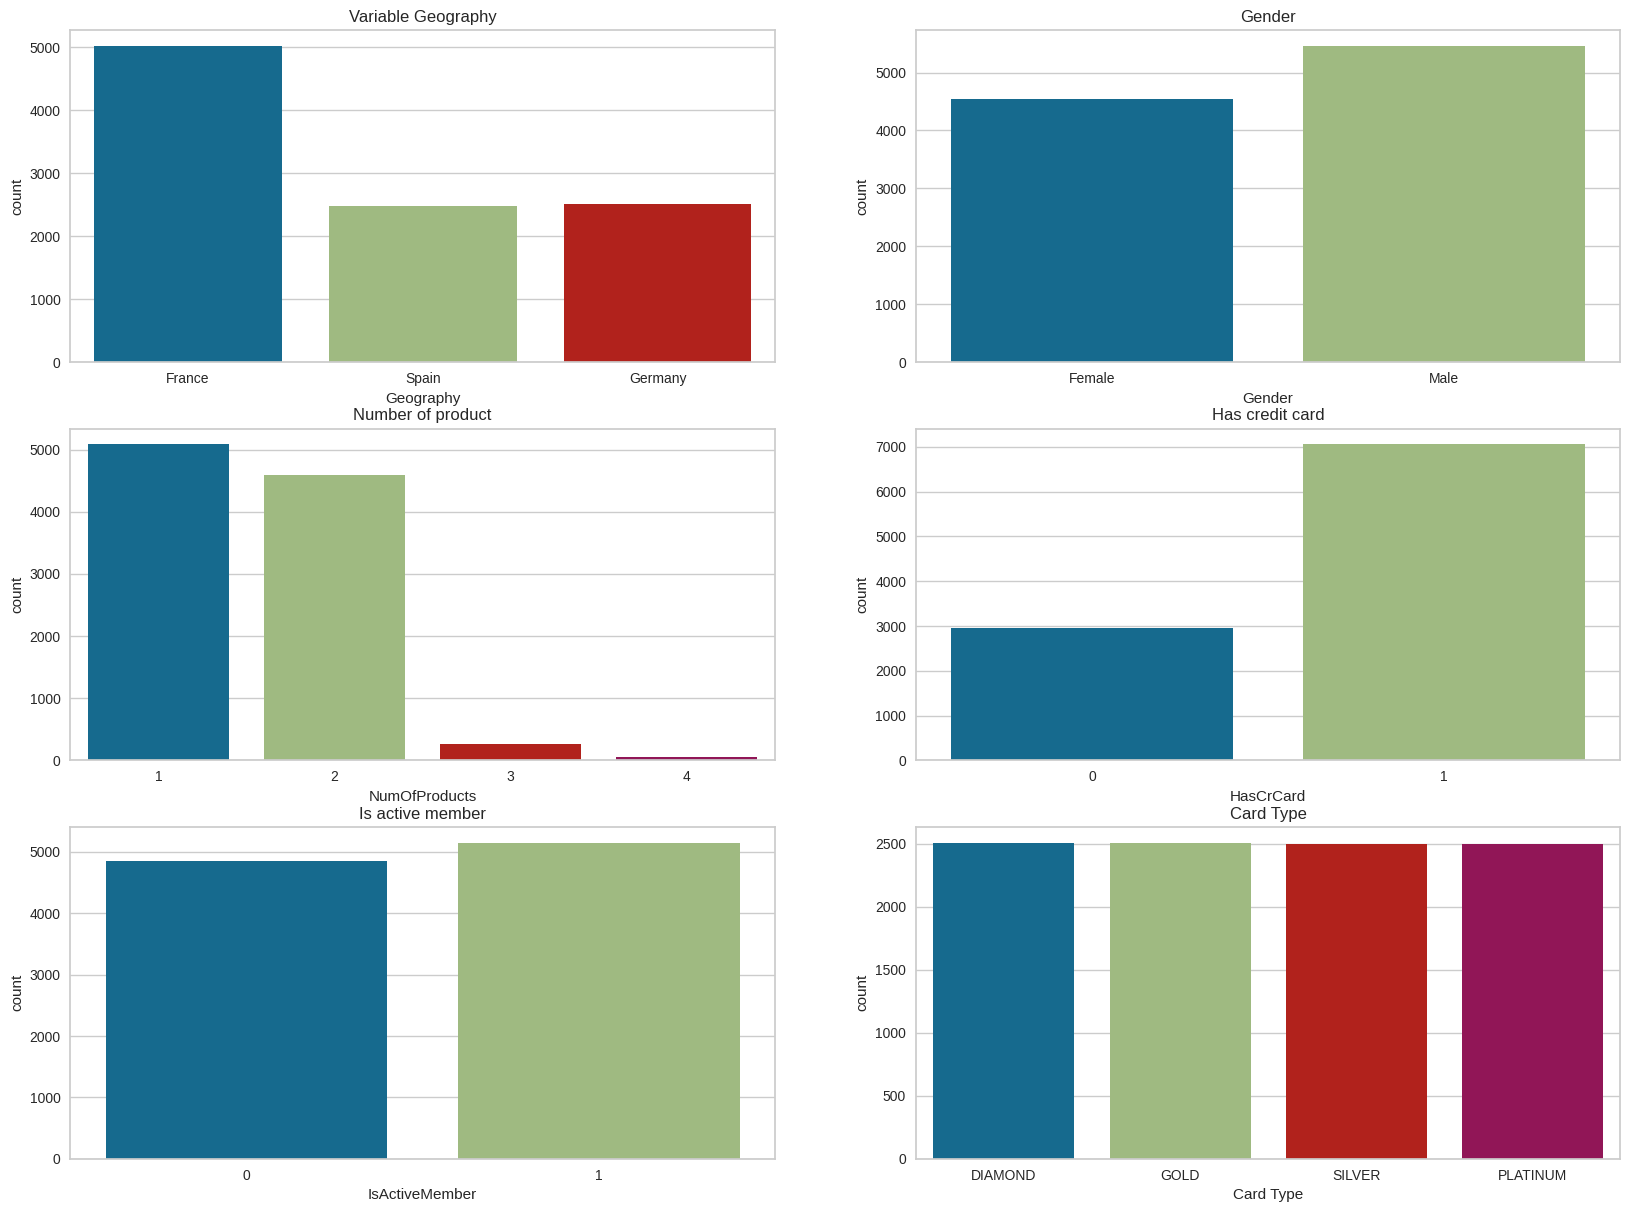

In [29]:
plt.figure(figsize = (20, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Gender')
sns.countplot(x = 'Gender', data = df)


plt.subplot(5, 2, 3)
plt.gca().set_title('Number of product')
sns.countplot(x = 'NumOfProducts', data = df)


plt.subplot(5, 2, 4)
plt.gca().set_title('Has credit card')
sns.countplot(x = 'HasCrCard', data = df)


plt.subplot(5, 2, 5)
plt.gca().set_title('Is active member')
sns.countplot(x = 'IsActiveMember', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Card Type')
sns.countplot(x = 'Card Type', data = df)




<Axes: title={'center': 'Boxplot CreditScore'}, xlabel='CreditScore'>

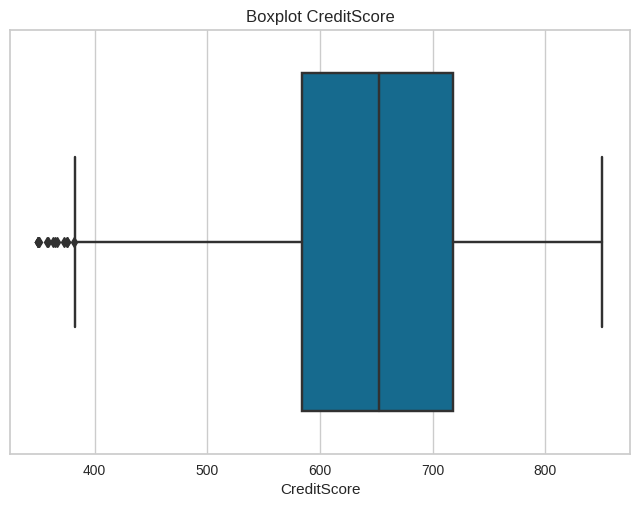

In [30]:
plt.title("Boxplot CreditScore")
sns.boxplot(x=df["CreditScore"])

In [31]:
#looking at the continous variable with box plot we can see that a few outlier
# At the age 1 outlier over 90 years old. we look at the balance boxplot, most people are don't have money in their account and those who have it are has a lots

<Axes: title={'center': 'CreditScore'}, xlabel='CreditScore'>

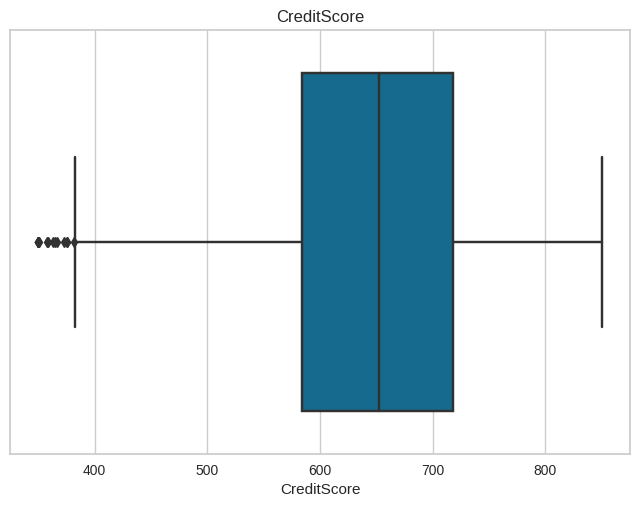

In [32]:
plt.title("CreditScore")
sns.boxplot(x=df["CreditScore"])

<Axes: title={'center': 'Age'}, xlabel='Age'>

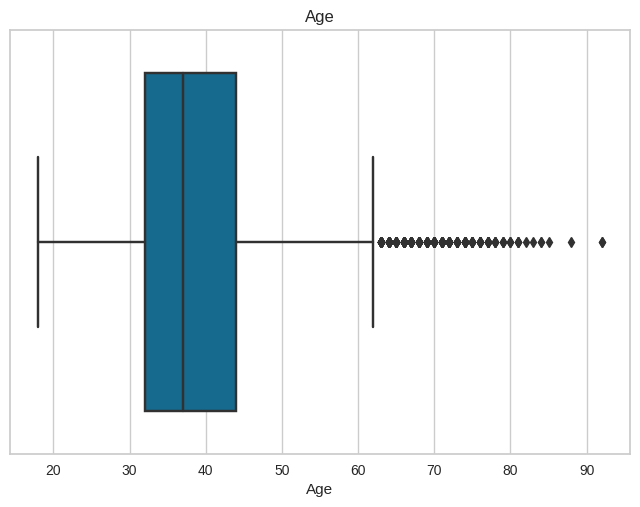

In [33]:
plt.title("Age")
sns.boxplot(x=df["Age"])

<Axes: title={'center': 'Balance'}, xlabel='Balance'>

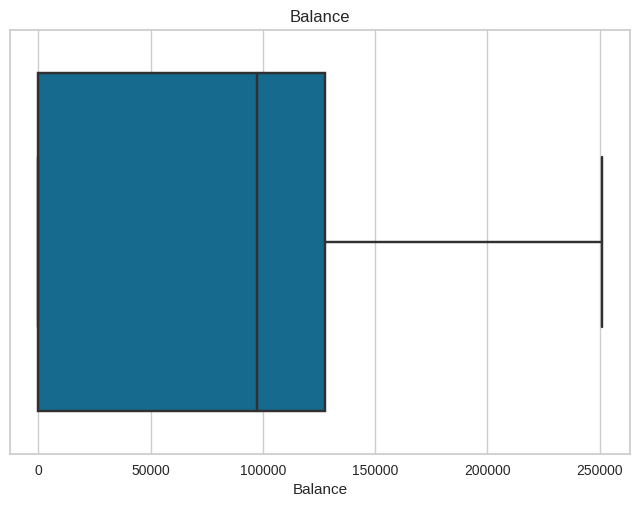

In [34]:
plt.title('Balance')
sns.boxplot(x=df['Balance'])

<Axes: title={'center': 'Satisfaction Score'}, xlabel='Satisfaction Score'>

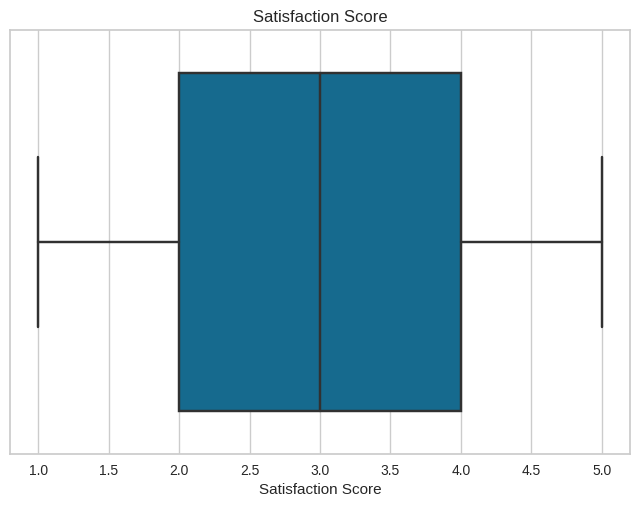

In [35]:
plt.title('Satisfaction Score')
sns.boxplot(x=df['Satisfaction Score'])

# Building model


In [4]:
#building model
df = df.drop(['CustomerId','Surname','RowNumber'], axis = 1)


In [5]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [ ]:
#encode the onject type with label encoder

In [6]:
#encode variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [8]:
encode_df = df.copy()

In [9]:
for columns in df.columns:
  if df[columns].dtypes == 'object':
    encode_df[columns] = label_encoder.fit_transform(df[columns])

In [10]:
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  int64  
 2   Gender              10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  int64  
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 1.1 MB


In [11]:
X = encode_df.drop('Exited',axis = 1)
y = encode_df['Exited']

In [12]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,5,1,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,1,0,300
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,5,2,771
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,3,3,564
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,2,1,339


<Axes: title={'center': 'Variable Exited'}, xlabel='Exited', ylabel='count'>

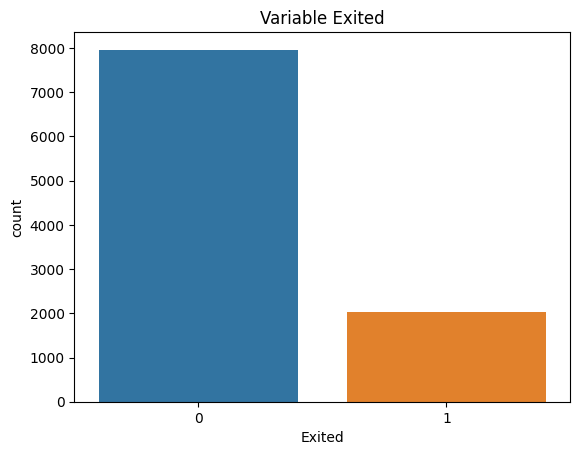

In [13]:

plt.gca().set_title('Variable Exited')
sns.countplot(x = 'Exited', data = df)

In [ ]:
#we can see here the y is inbalance, so i use Randomversampler to Oversampling

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [16]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [17]:
overall_report = pd.DataFrame(columns=['Model','Precision','Recall','F1-Score','Support'])

In [18]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)


    overall_report = overall_report.append({
        'Model': model_name,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'Support': report['weighted avg']['support']
    }, ignore_index=True)


<ipython-input-18-31b71ae6e106>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_report = overall_report.append({
<ipython-input-18-31b71ae6e106>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_report = overall_report.append({
<ipython-input-18-31b71ae6e106>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_report = overall_report.append({
<ipython-input-18-31b71ae6e106>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_report = overall_report.append({
<ipython-input-18-31b71ae6e106>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

In [19]:
overall_report

,Model,Precision,Recall,F1-Score,Support
0,Logistic Regression,0.785907,0.6615,0.694075,2000
1,Decision Tree,0.997500,0.9975,0.997497,2000
2,Random Forest,0.999500,0.9995,0.999500,2000
3,SVM,0.736010,0.4535,0.489652,2000
4,KNN,0.674669,0.5430,0.586916,2000
5,Naive Bayes,0.831899,0.7645,0.783525,2000


In [ ]:
# as result decision, randomforest and naive bayes has good result. So i use three of them to predict

In [20]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.7645

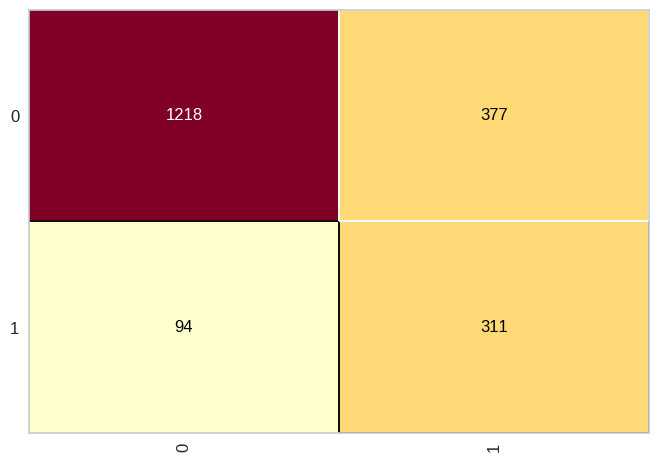

In [21]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9975

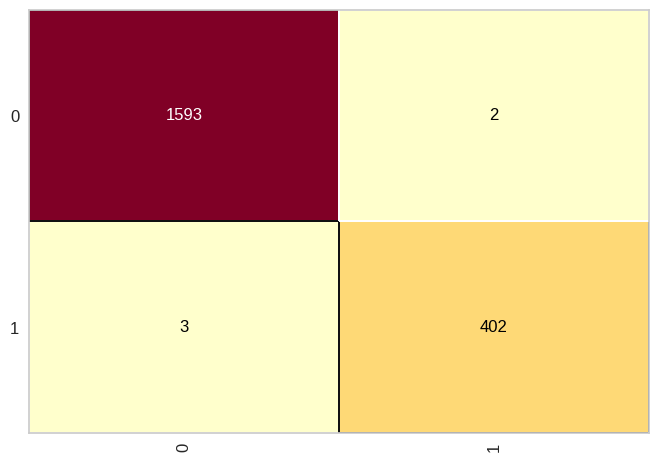

In [22]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9995

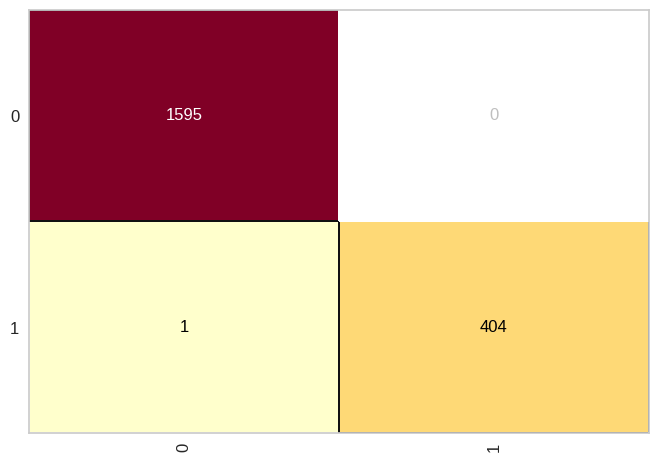

In [23]:
#randomforest
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)


cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
#random forest has the best result with almost 99,95%